In [1]:
library(ggplot2)
library(caroline)
library(ggmap)
library(hexbin)

In [2]:
map = get_map("nyc", zoom = 10)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=nyc&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=nyc&sensor=false


In [2]:
nyc = read.csv("NYPD_Complaint_Data_Historic.csv")
#Read the NYPD crime report csv file as a dataframe

In [4]:
crime = subset(nyc, OFNS_DESC == 'DANGEROUS DRUGS', select=c('Latitude','Longitude'))
#find the reported locations of where serious drug offenses occurred and save them to another dataframe

In [5]:
head(crime)

,Latitude,Longitude
3,40.80261,-73.94505
7,40.72020,-73.98874
21,40.65564,-73.95986
23,40.74931,-73.89758
29,40.69649,-73.94943
32,40.72066,-73.98806


Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Warning message:
"Removed 7602 rows containing non-finite values (stat_bin2d)."

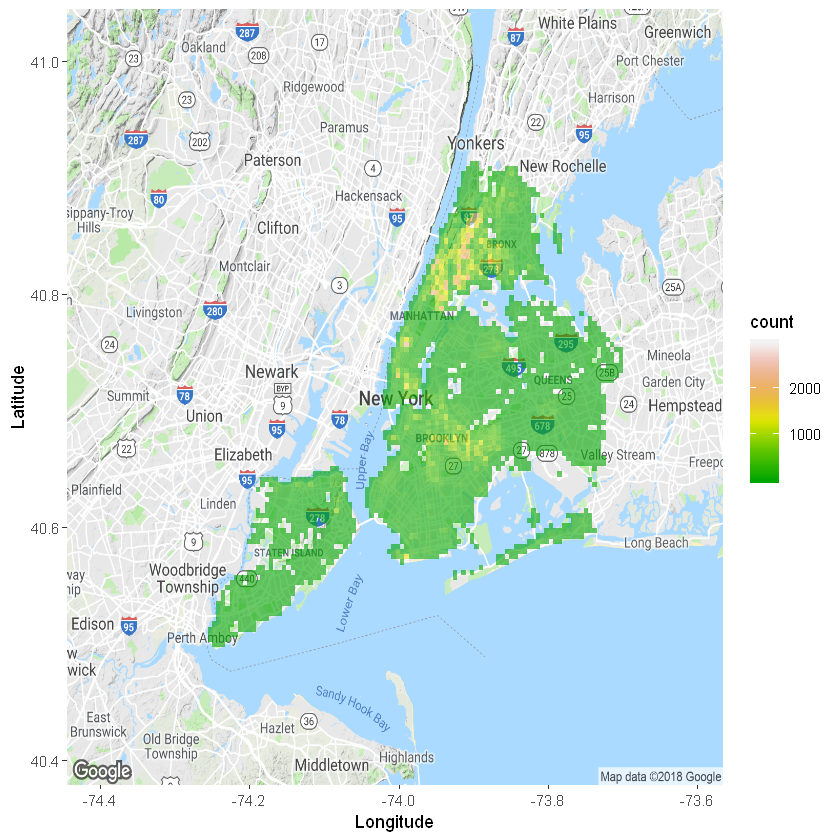

In [6]:
ggmap(map, base_layer = ggplot(crime, aes(x=Longitude, y=Latitude))) +
coord_cartesian() +
stat_bin_2d(bins=150,alpha=0.6) + scale_fill_gradientn(colours = terrain.colors(10))
#visualize the drug crime data by overlaying it onto a map

Warning message:
"Removed 205877 rows containing missing values (geom_point)."

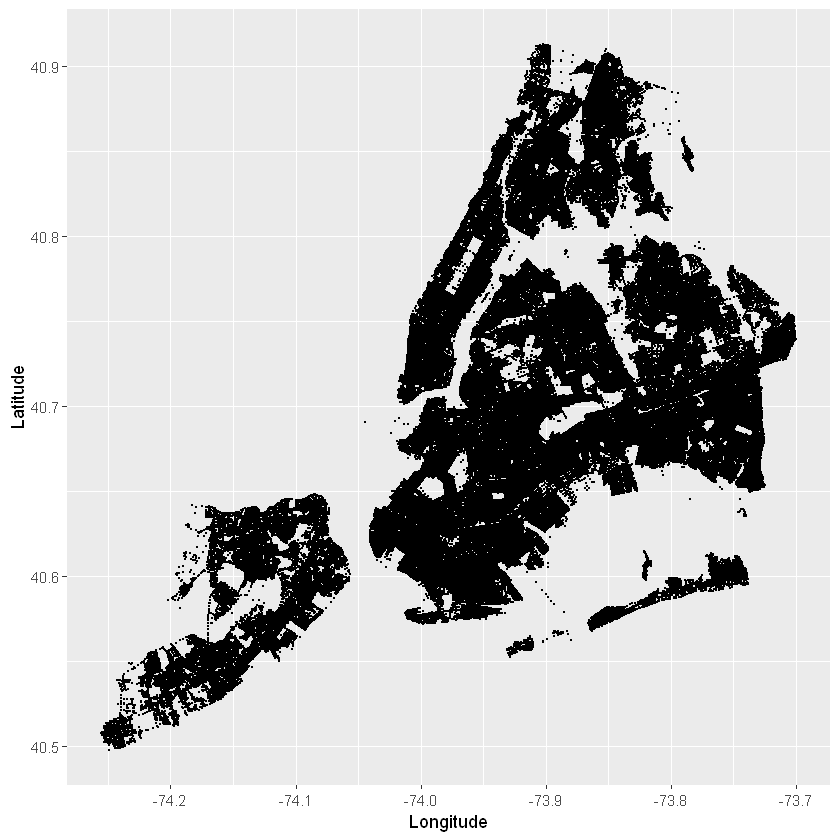

In [21]:
plot <- ggplot(nyc,aes(x=Longitude, y=Latitude))
plot + geom_point(size=0.06)
#visualization of all crime in nyc without using bins or a map layer

Warning message:
"Removed 205877 rows containing non-finite values (stat_binhex)."Warning message:
"Removed 205877 rows containing missing values (geom_point)."

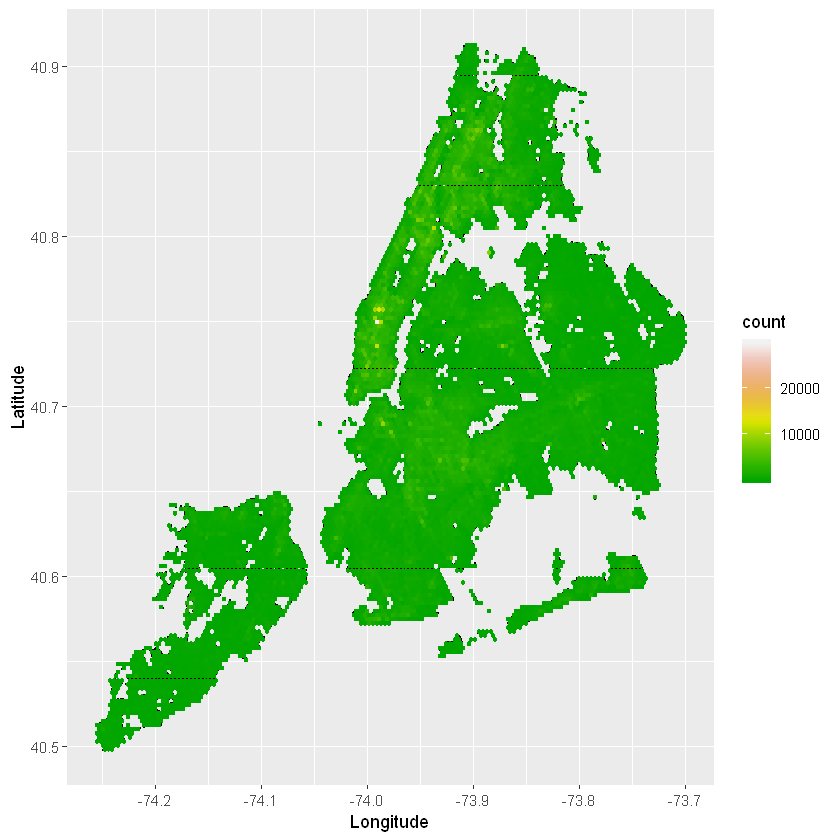

In [23]:
plot <- ggplot(nyc,aes(x=Longitude, y=Latitude))
plot + geom_point(size=0.06) + geom_hex(bins = 150) + scale_fill_gradientn(colours = terrain.colors(10))
#visualization of all crime in nyc, showing where crime is most frequently reported

Warning message:
"Removed 7602 rows containing non-finite values (stat_binhex)."

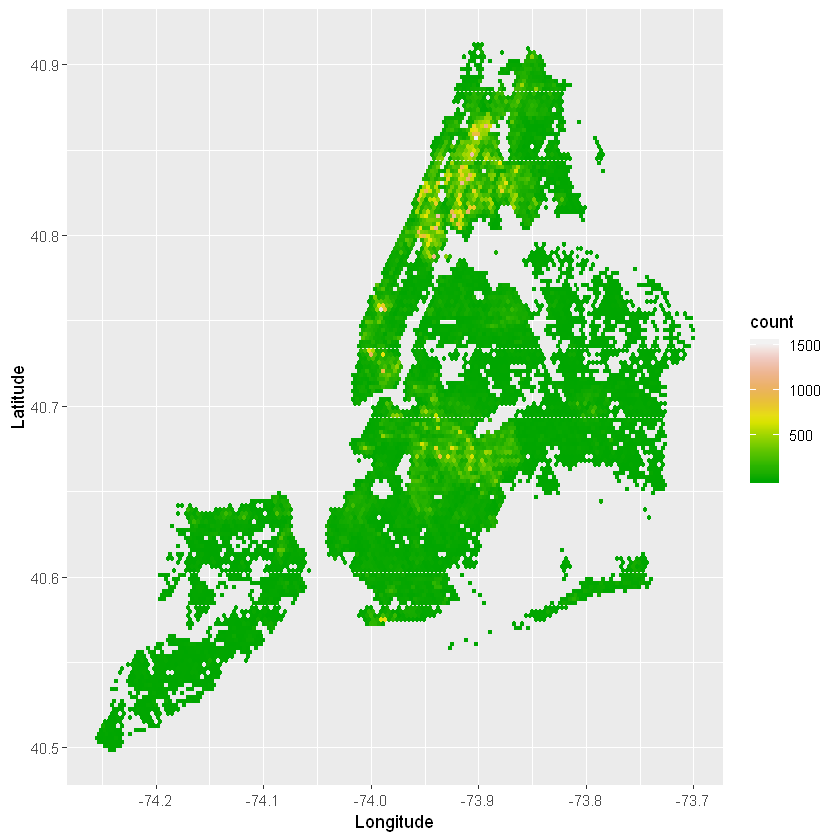

In [16]:
plot2 <- ggplot(crime,aes(x=Longitude, y=Latitude))
plot2 + geom_hex(bins = 150) + scale_fill_gradientn(colours = terrain.colors(10))
#same visualization as the plot above, only this time using just the drug offense data
#we get a much more clear picture of where crime is likely to occur by visualizing specific crimes instead of all reported crime
#in the city

In [28]:
precincts = subset(nyc, OFNS_DESC == 'DANGEROUS DRUGS', select=c('ADDR_PCT_CD','RPT_DT'))
table(precincts[1])
#shows a table of serious drug offenses by the number of reported crimes per NYPD precinct


    1     5     6     7     9    10    13    14    17    18    19    20    22 
  923  1095  4510  4432  4822  3083  1641  4877   547  4517   799   979   814 
   23    24    25    26    28    30    32    33    34    40    41    42    43 
 9093  3252  9677  3144  7439  8535  9724  4347  2944 19206  6512 12317 22987 
   44    45    46    47    48    49    50    52    60    61    62    63    66 
21534  2549 18669 12150  9262  3724  3205 15251  5440  3025  2317  1516  1345 
   67    68    69    70    71    72    73    75    76    77    78    79    81 
 6805  2743  3099  4151  5998  3276 14594 21962  2712 11628   923  5651  6664 
   83    84    88    90    94   100   101   102   103   104   105   106   107 
 2592  1837  3490  4603  1097   943  1037   565  3306  1676   759   943   730 
  108   109   110   111   112   113   114   115   120   121   122   123 
 1152   845  1369   528   495  1529  3256  5039  7513  1159  2627  1492 